In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/alenjose/Desktop/data/meriSKILL_internship/Sales Data 2.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
 7   Sales             185950 non-null  float64
 8   City              185950 non-null  object 
 9   Hour              185950 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 14.2+ MB


In [5]:
df['Purchase Address'].iloc[0].split(',')[2].strip()

'NY 10001'

In [6]:
df['Area_code'] = df['Purchase Address'].apply(lambda x:x.split(',')[2].strip())

In [7]:
df['Purchase Address']

0         136 Church St, New York City, NY 10001
1            562 2nd St, New York City, NY 10001
2           277 Main St, New York City, NY 10001
3            410 6th St, San Francisco, CA 94016
4                  43 Hill St, Atlanta, GA 30301
                           ...                  
185945             795 Pine St, Boston, MA 02215
185946     495 North St, New York City, NY 10001
185947     319 Ridge St, San Francisco, CA 94016
185948      916 Main St, San Francisco, CA 94016
185949            209 11th St, Atlanta, GA 30301
Name: Purchase Address, Length: 185950, dtype: object

In [8]:
df['Purchase Address'] = df['Purchase Address'].str.replace(r', \w\w \d{5}$', '', regex=True)

In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [10]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Hour', 'Area_code'],
      dtype='object')

In [11]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Area_code
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City",12,1700.00,New York City,0,NY 10001
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City",12,600.00,New York City,7,NY 10001
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City",12,11.95,New York City,18,NY 10001
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco",12,149.99,San Francisco,15,CA 94016
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta",12,11.95,Atlanta,12,GA 30301


## Descriptive Statistics : 

In [12]:
df.describe()

,Order ID,Quantity Ordered,Price Each,Order Date,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735,2019-07-18 21:54:38.887550464,7.059140,185.490917,14.413305
min,141234.000000,1.000000,2.990000,2019-01-01 03:07:00,1.000000,2.990000,0.000000
25%,185831.250000,1.000000,11.950000,2019-04-16 21:05:15,4.000000,11.950000,11.000000
50%,230367.500000,1.000000,14.950000,2019-07-17 20:40:30,7.000000,14.950000,15.000000
75%,275035.750000,1.000000,150.000000,2019-10-26 08:14:00,10.000000,150.000000,19.000000
max,319670.000000,9.000000,1700.000000,2020-01-01 05:13:00,12.000000,3400.000000,23.000000
std,51512.737110,0.442793,332.731330,NaN,3.502996,332.919771,5.423416


In [13]:
print("total number of records :", len(df))
print("total number of unique orders:",df['Order ID'].nunique())

total number of records : 185950
total number of unique orders: 178437


In [14]:
df['Area_code'].unique()

array(['NY 10001', 'CA 94016', 'GA 30301', 'OR 97035', 'TX 75001',
       'CA 90001', 'MA 02215', 'TX 73301', 'ME 04101', 'WA 98101'],
      dtype=object)

In [15]:
df['Product'].unique()

array(['Macbook Pro Laptop', 'LG Washing Machine', 'USB-C Charging Cable',
       '27in FHD Monitor', 'AA Batteries (4-pack)',
       'Bose SoundSport Headphones', 'AAA Batteries (4-pack)',
       'ThinkPad Laptop', 'Lightning Charging Cable', 'Google Phone',
       'Wired Headphones', 'Apple Airpods Headphones', 'Vareebadd Phone',
       'iPhone', '20in Monitor', '34in Ultrawide Monitor',
       'Flatscreen TV', '27in 4K Gaming Monitor', 'LG Dryer'],
      dtype=object)

## Temporal Analysis : 

### Hourly sales trends 

In [16]:
df[df['Order ID'].duplicated()].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Area_code
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston",12,11.95,Boston,12,MA 02215
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston",12,99.99,Boston,12,MA 02215
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston",12,11.99,Boston,12,MA 02215
37,295698,USB-C Charging Cable,2,11.95,2019-12-13 14:32:00,"175 1st St, New York City",12,23.90,New York City,14,NY 10001
43,295703,Bose SoundSport Headphones,1,99.99,2019-12-17 12:27:00,"502 Jefferson St, Austin",12,99.99,Austin,12,TX 73301


**it is clear there are multiple records with same order id, where a customer bought multiple products**

In [17]:
df.Hour.unique()

array([ 0,  7, 18, 15, 12, 22,  9, 23, 11, 13, 17, 19, 14, 16,  1,  6, 10,
       20, 21,  8,  3,  5,  2,  4])

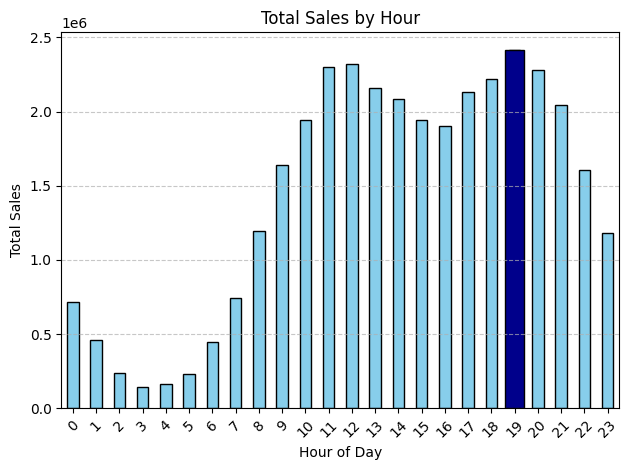

In [18]:
df.groupby(by='Hour')['Sales'].sum().plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Total Sales by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')

max_sales_hr = df.groupby(by='Hour')['Sales'].sum().idxmax()
max_sales_value = df.groupby(by='Hour')['Sales'].sum().max()

plt.bar(max_sales_hr, max_sales_value, color='darkblue', edgecolor='black')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=45)

plt.tight_layout()  
plt.show()

### Monthly Sales Trends : 

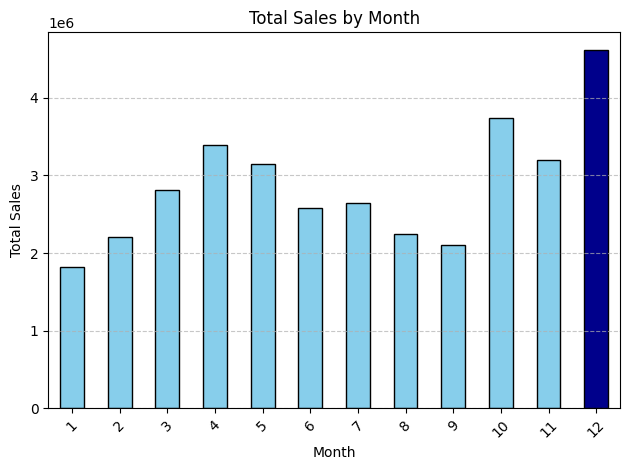

In [19]:
sales_by_month = df.groupby(by='Month')['Sales'].sum()

max_sales_month = sales_by_month.idxmax()

colors = ['skyblue' if month != max_sales_month else 'darkblue' for month in sales_by_month.index]

sales_by_month.plot(kind='bar', color=colors, edgecolor='black')

plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

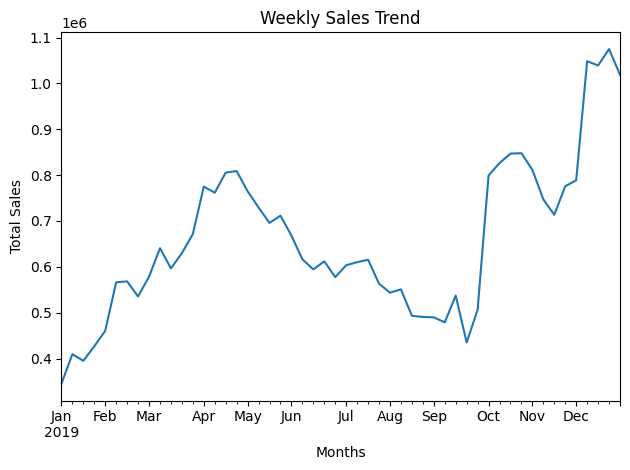

In [20]:
df_1 = df.copy()

df_1.set_index('Order Date', inplace=True)
weekly_sales = df_1.resample('W').sum()['Sales'].iloc[:-1]

weekly_sales.plot()
plt.title('Weekly Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Months')
plt.tight_layout()
plt.show()

## Product Analysis : 

**Best selling products by sales/quantity ordered**

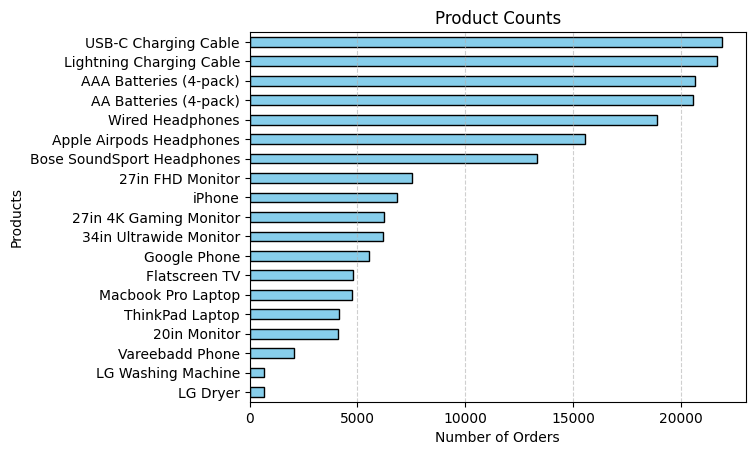

In [21]:
df.Product.value_counts().sort_values().plot(kind='barh', color='skyblue', edgecolor='black')

plt.title('Product Counts')
plt.xlabel('Number of Orders')
plt.ylabel('Products')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

In [22]:
# to make all unique products have the same price
sum(df.groupby('Product')['Price Each'].nunique() > 1)

0

In [23]:
# make sure the total sales is accurate
sum(df['Price Each'] * df['Price Each'] == df['Sales'])

0

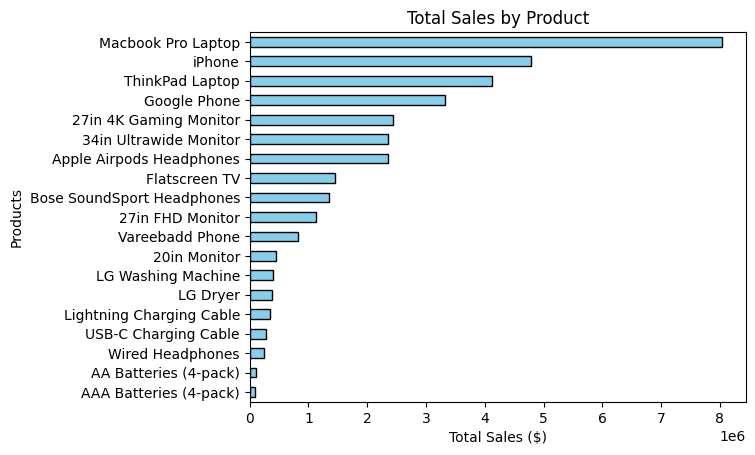

In [24]:
df.groupby('Product')['Sales'].sum().sort_values().plot(kind='barh', color='skyblue', edgecolor='black')

plt.title('Total Sales by Product')
plt.xlabel('Total Sales ($)')
plt.ylabel('Products')

plt.show()

In [25]:
from itertools import combinations
from collections import Counter

df_grouped = df[df['Order ID'].duplicated(keep=False)].copy()
df_grouped['Grouped'] = df_grouped.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Drop duplicate Order IDs
df_grouped = df_grouped[['Order ID', 'Grouped']].drop_duplicates()

# 2. & 3. Count pairs
count = Counter()

for row in df_grouped['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))  # Change 2 to any other number for different groupings
    
print("Products usually bought together:")
print("-" * 40) 


for (product1, product2), count in count.most_common(10):
    print(f"{product1} & {product2}: {count} times")

Products usually bought together:
----------------------------------------
iPhone & Lightning Charging Cable: 1005 times
Google Phone & USB-C Charging Cable: 987 times
iPhone & Wired Headphones: 447 times
Google Phone & Wired Headphones: 414 times
Vareebadd Phone & USB-C Charging Cable: 361 times
iPhone & Apple Airpods Headphones: 360 times
Google Phone & Bose SoundSport Headphones: 220 times
USB-C Charging Cable & Wired Headphones: 160 times
Vareebadd Phone & Wired Headphones: 143 times
Lightning Charging Cable & Wired Headphones: 92 times


## Geographical Analysis : 

### Sales by city : 

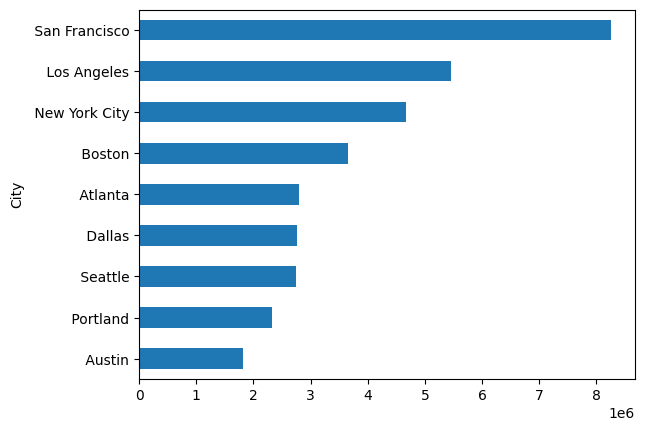

In [26]:
df.groupby('City')['Sales'].sum().sort_values().plot(kind='barh')
plt.show()

### Avg order quantity by city

The average quantities ordered per city are very close to each other, suggesting a few things : 
* most customers, regardless of the city, order similiar quantities of products.
* there is no need to customize marketing strategy based on behaviour of cities

In [27]:
orders = df.groupby('Order ID').agg({
    'Quantity Ordered': 'sum',
    'City': 'first'  
}).reset_index()

orders.groupby('City')['Quantity Ordered'].mean().reset_index().set_index('City')

,Quantity Ordered
City,
Atlanta,1.164807
Austin,1.172889
Boston,1.179971
Dallas,1.174860
Los Angeles,1.168117
New York City,1.171251
Portland,1.173038
San Francisco,1.171127
Seattle,1.172392


## Sales Analysis : 

In [28]:
df_1 = df.copy()
df_1['date'] = df_1['Order Date'].dt.date
df_1.set_index('date', inplace=True)
df_1.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Area_code
date,,,,,,,,,,,
2019-12-30,295665,Macbook Pro Laptop,1,1700.0,2019-12-30 00:01:00,"136 Church St, New York City",12,1700.0,New York City,0,NY 10001
2019-12-29,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City",12,600.0,New York City,7,NY 10001


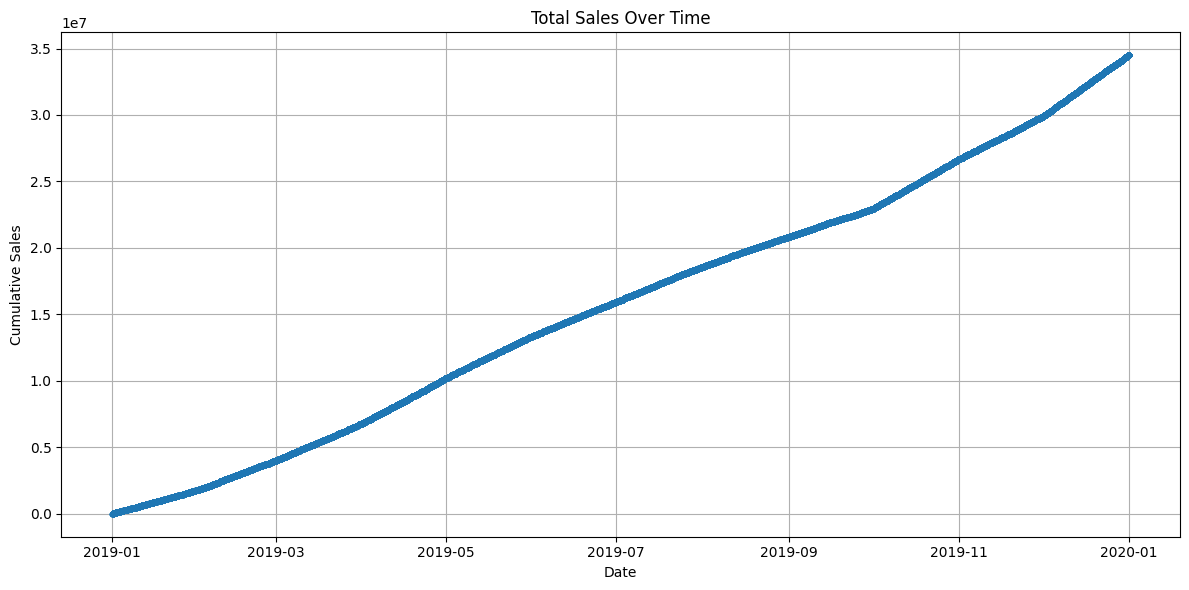

In [29]:
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

daily_sales['Cumulative Sales'] = daily_sales['Sales'].cumsum()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Order Date'], daily_sales['Cumulative Sales'], marker='.', linestyle='-')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

### Average sales per order : 

In [30]:
print("Average sales per order : ", df.groupby('Order ID')['Sales'].sum().mean())

Average sales per order :  193.30091836334392


### Sales Distribution : 

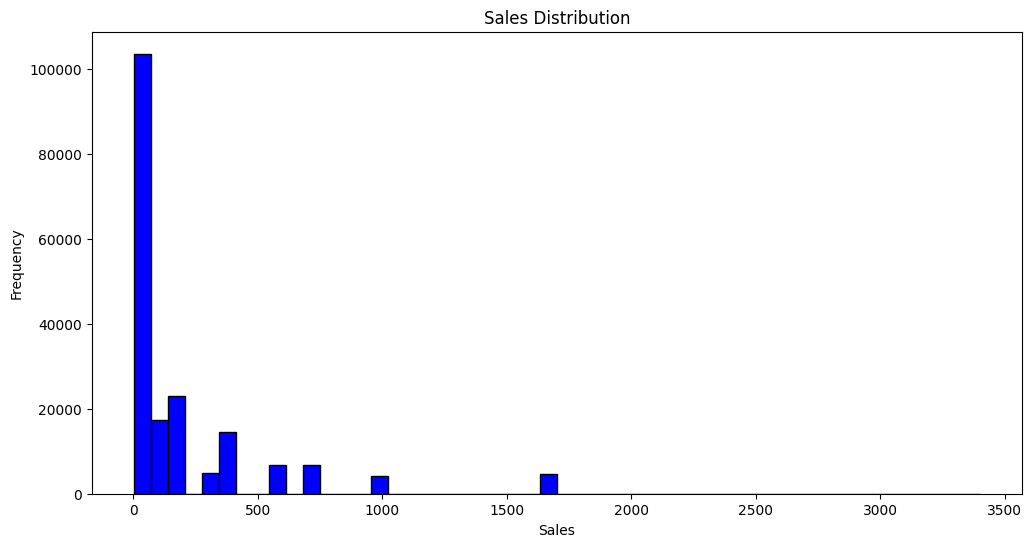

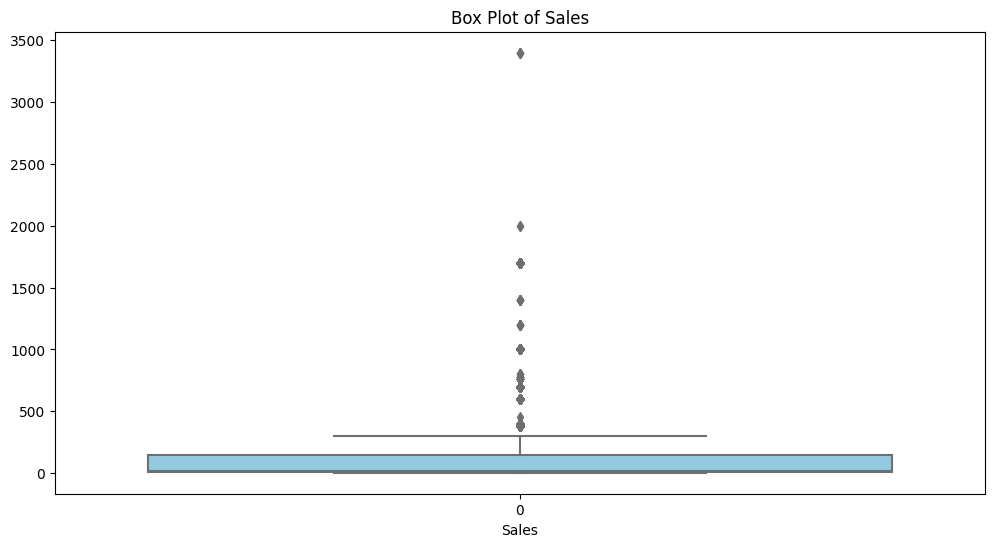

In [31]:
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.hist(df['Sales'], bins=50, color='blue', edgecolor='black')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(df['Sales'], color='skyblue')
plt.title('Box Plot of Sales')
plt.xlabel('Sales')
plt.show()

## Customer Analysis : 

### Top 10 customers 

In [32]:
df.groupby('Purchase Address')['Sales'].sum().sort_values(ascending=False).head(10)

Purchase Address
668 Park St, San Francisco        4379.99
391 1st St, Seattle               4100.00
795 1st St, Atlanta               4100.00
790 Adams St, Portland            4000.00
10 1st St, San Francisco          4000.00
731 11th St, New York City        3919.88
208 Chestnut St, San Francisco    3789.99
949 Hickory St, New York City     3779.99
611 Wilson St, San Francisco      3718.78
610 14th St, Los Angeles          3699.98
Name: Sales, dtype: float64

### Avg Sale per Cust : 

In [33]:
print("average sales per customer : ", df.groupby('Purchase Address')['Sales'].sum().mean())

average sales per customer :  245.71702514016226


## Correlation Analysis : 

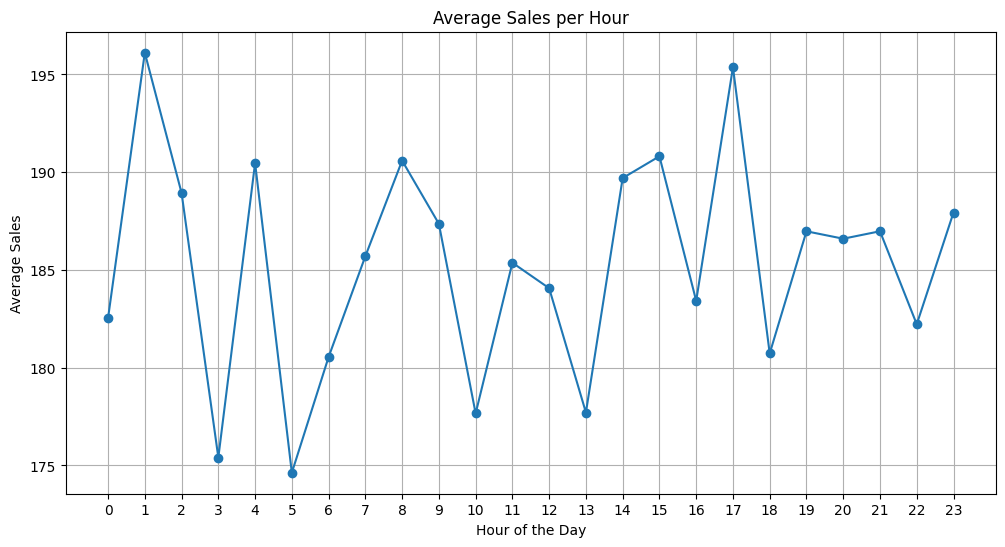

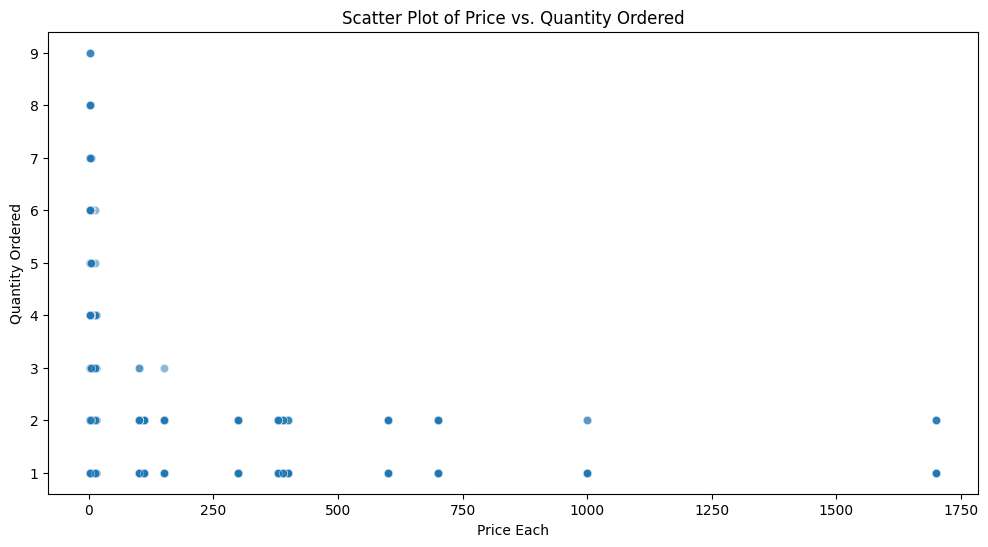

Pearson's correlation coefficient between 'Price Each' and 'Quantity Ordered': -0.15


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# correlation between 'Hour' and 'Sales'
plt.figure(figsize=(12, 6))
average_sales_per_hour = df.groupby('Hour')['Sales'].mean()
average_sales_per_hour.plot(kind='line', marker='o')
plt.title('Average Sales per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Sales')
plt.grid(True)
plt.xticks(range(0, 24)) 
plt.show()

# correlation between 'Price Each' and 'Quantity Ordered'
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Price Each'], y=df['Quantity Ordered'], alpha=0.5)
plt.title('Scatter Plot of Price vs. Quantity Ordered')
plt.xlabel('Price Each')
plt.ylabel('Quantity Ordered')
plt.show()

# Pearson's correlation coefficient for 'Price Each' and 'Quantity Ordered'
correlation_coefficient = df['Price Each'].corr(df['Quantity Ordered'])
print(f"Pearson's correlation coefficient between 'Price Each' and 'Quantity Ordered': {correlation_coefficient:.2f}")


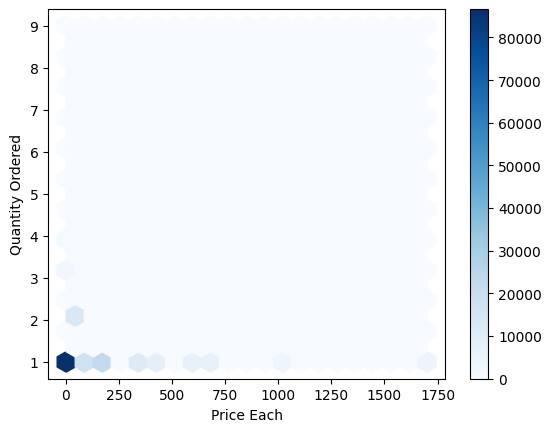

In [35]:
df.plot.hexbin(x='Price Each', y='Quantity Ordered', gridsize=20, cmap='Blues')
plt.show()

In [36]:
correlation_spearman = df[['Price Each', 'Quantity Ordered']].corr(method='spearman')
print(correlation_spearman)

                  Price Each  Quantity Ordered
Price Each          1.000000         -0.343767
Quantity Ordered   -0.343767          1.000000


## Segmentation : 

In [37]:
# total sales for each city
city_sales = df.groupby('City')['Sales'].sum().reset_index()

# threshold values
high_threshold = city_sales['Sales'].quantile(0.75)
low_threshold = city_sales['Sales'].quantile(0.25)

# segment cities based on thresholds
city_sales['Sales Volume Category'] = 'medium'  # default to medium
city_sales.loc[city_sales['Sales'] >= high_threshold, 'Sales Volume Category'] = 'high'
city_sales.loc[city_sales['Sales'] <= low_threshold, 'Sales Volume Category'] = 'low'

city_sales.sort_values(by='Sales Volume Category',)

,City,Sales,Sales Volume Category
4,Los Angeles,5452570.80,high
5,New York City,4664317.43,high
7,San Francisco,8262203.91,high
1,Austin,1819581.75,low
6,Portland,2320490.61,low
8,Seattle,2747755.48,low
0,Atlanta,2795498.58,medium
2,Boston,3661642.01,medium
3,Dallas,2767975.40,medium


In [38]:
import pandas as pd

# total sales for each product
product_sales = df.groupby('Product')['Sales'].sum().reset_index()

top_threshold = product_sales['Sales'].quantile(0.67)  # Top 1/3 performers
bottom_threshold = product_sales['Sales'].quantile(0.33)  # Bottom 1/3 performers

# segment products based on thresholds
product_sales['Performance Category'] = 'middle'  # default to middle
product_sales.loc[product_sales['Sales'] >= top_threshold, 'Performance Category'] = 'top'
product_sales.loc[product_sales['Sales'] <= bottom_threshold, 'Performance Category'] = 'bottom'

product_sales.sort_values(by='Performance Category',ascending=False)

,Product,Sales,Performance Category
9,Google Phone,3319200.00,top
1,27in 4K Gaming Monitor,2435097.56,top
14,ThinkPad Laptop,4129958.70,top
13,Macbook Pro Laptop,8037600.00,top
18,iPhone,4794300.00,top
3,34in Ultrawide Monitor,2355558.01,top
6,Apple Airpods Headphones,2349150.00,middle
7,Bose SoundSport Headphones,1345565.43,middle
8,Flatscreen TV,1445700.00,middle
11,LG Washing Machine,399600.00,middle


In [39]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Area_code
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City",12,1700.00,New York City,0,NY 10001
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City",12,600.00,New York City,7,NY 10001
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City",12,11.95,New York City,18,NY 10001
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco",12,149.99,San Francisco,15,CA 94016
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta",12,11.95,Atlanta,12,GA 30301
...,...,...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston",6,2.99,Boston,19,MA 02215
185946,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City",6,149.99,New York City,19,NY 10001
185947,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco",6,11.95,San Francisco,18,CA 94016
185948,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco",6,11.95,San Francisco,18,CA 94016


In [48]:
duplicated_dates = df_1[df_1.index.duplicated()].index
print(duplicated_dates)
df_1 = df_1[~df_1.index.duplicated(keep='first')]

Index([2019-12-13, 2019-12-28, 2019-12-25, 2019-12-25, 2019-12-25, 2019-12-25,
       2019-12-23, 2019-12-04, 2019-12-22, 2019-12-16,
       ...
       2019-06-11, 2019-06-10, 2019-06-07, 2019-06-07, 2019-06-09, 2019-06-07,
       2019-06-01, 2019-06-22, 2019-06-26, 2019-06-25],
      dtype='object', name='date', length=185584)


In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_1 = df_1.asfreq('D')

result = seasonal_decompose(df_1['Sales'], model='additive')

trend = result.trend
seasonal = result.seasonal
residual = result.resid

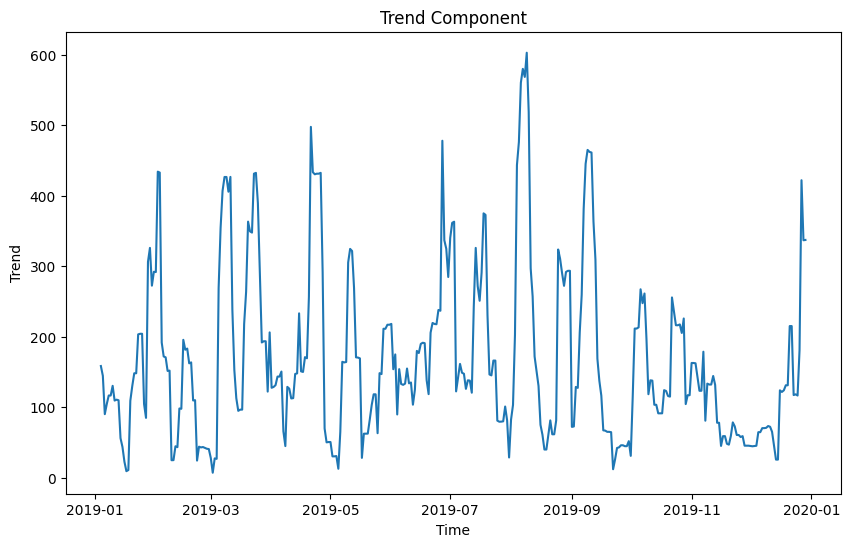

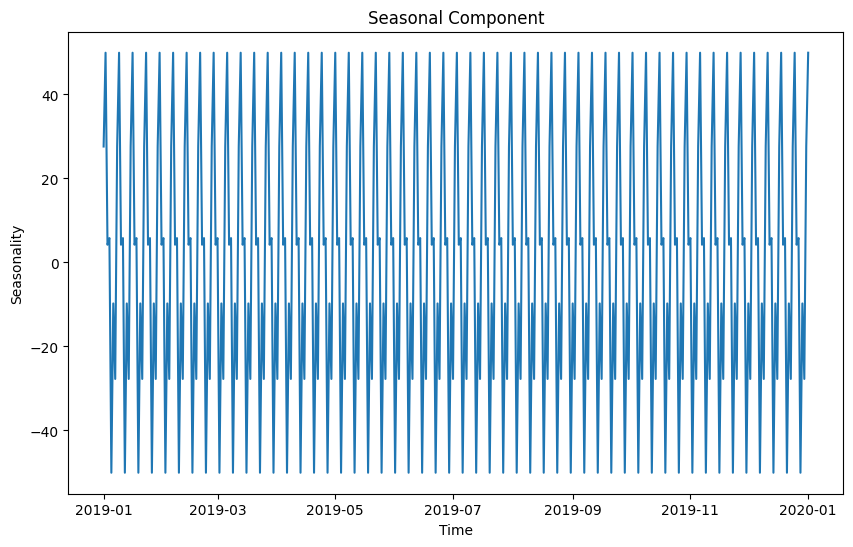

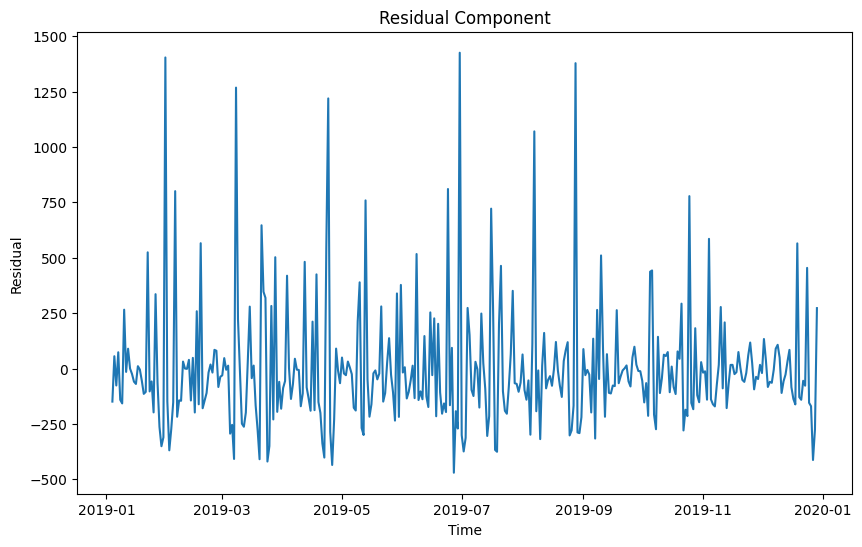

In [50]:
import matplotlib.pyplot as plt

# Assuming you've already performed the decomposition:
# result = seasonal_decompose(df_1['Sales'], model='additive')

# Plot the trend component
plt.figure(figsize=(10,6))
plt.plot(result.trend)
plt.title('Trend Component')
plt.xlabel('Time')
plt.ylabel('Trend')
plt.show()

# Plot the seasonal component
plt.figure(figsize=(10,6))
plt.plot(result.seasonal)
plt.title('Seasonal Component')
plt.xlabel('Time')
plt.ylabel('Seasonality')
plt.show()

# Plot the residuals
plt.figure(figsize=(10,6))
plt.plot(result.resid)
plt.title('Residual Component')
plt.xlabel('Time')
plt.ylabel('Residual')
plt.show()
